 1단계 : 입력 계층을 통해 외부로부터 들어온 입력 신호 벡터(x)에 가중치 행렬 W를 곱하여 은닉 계층으로 보냅니다. 여기서 입력 노드 중 하나에는 외부 정보가 아니라 상수 1이 항상 들어옵니다. 이 상수 입력은 편향값 보상에 사용됩니다.  
 
 2단계 : 은닉 계층의 각 노드들은 자신에게 입력된 신호 벡터에 활성화 함수(activation function)인 fn()를 적용한 결과 벡터(h)로 보냅니다. 뉴런의 동작을 흉내 내고 비선형성을 보상하는 활성화 함수로 시그모이드, 하이퍼볼릭탄젠트 함수 등을 사용합니다.  
 
 3단계 : 은닉 계층의 결과 벡턴에 새로운 가중치 행렬 W를 곱한 뒤 출력 계층으로 보냅니다.  
 
 4단계 : 출력 계층으로 들어온 신호 벡터에 출력 활성화 함수인 f()를 적용하고 그 결과 벡터(y)를 신경망 외부로 최종 출력합니다. 분류의 경우에는 출력용 활성화 함수로 [소프트맥스(soft max)](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=ko)연산을 주로 사용합니다. 일반적으로 회귀 방식에는 사용하지 않습니다.

단계  

*   1단계 : 분류 ANN 구현용 패키지 불러오기
*   2단계 : 분류 ANN에 필요한 파라미터 설정
*   3단계 : 분류 ANN 모델 구현
*   4단계 : 학습과 성능 평가용 데이터 불러오기
*   5단계 : 분류 ANN 학습 및 검증
*   6단계 : 분류 ANN 학습 결과 분석



In [0]:
# 1단계 : 분류 ANN 구현용 패키지 불러오기
# layers는 각 계층을 만드는 모듈
# models는 각 layer들을 연결하여 신경망 모델을 만든 후, 컴파일하고, 학습시키는 역할
from keras import layers, models

In [0]:
# 2단계 : 분류 ANN에 필요한 파라미터 설정 , 3단계 : 분류 ANN 모델 구현
# Nin, Nh, number_of_class, Nout : 입력 계층의 노드 수, 은닉 계층의 노드 수, 출력값이 가질 클래스 수, 출력 노드 수

In [0]:
# 분산 방식 모델링을 포함하는 함수형 구현
def ANN_models_func(Nin, Nh, Nout):
  x = layers.Input(shape=(Nin,)) #입력 계층 정의
  h = layers.Activation('relu')(layers.Dense(Nh)(x)) #은닉 계층 정의
  y = layers.Activation('softmax')(layers.Dense(Nout)(h)) #출력 계층 정의
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #컴파일
  return model

In [0]:
# 연쇄 방식 모델링을 포함하는 함수형 구현

# 연쇄 방식은 추가되는 계층을 기술할 때 간편하게 기술할 수 있다
def ANN_seq_func(Nin, Nh, Nout):
  model = models.Sequential()
  model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,))) #입력 계층과 은닉 계층의 형태가 동시에 정해짐
  model.add(layers.Dense(Nout, activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
# 분산 방식 모델링을 포함하는 객체지향형 구현

class ANN_models_class(models.Model):
  def __init__(self, Nin, Nh, Nout):
    hidden = layers.Dense(Nh)
    output = layers.Dense(Nout)
    relu = layers.Activation('relu')
    softmax = layers.Activation('softmax')
    
    x = layers.Input(shape=(Nin,))
    h = relu(hidden(x))
    y = softmax(output(h))
    
    super().__init__(x,y)
    
    self.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [0]:
# 연쇄 방식 모델링을 포함하는 객체지향형 구현
class ANN_seq_class(models.Sequential):
  def __init__(self, Nin, Nh, Nout):
    super().__init__()
    self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    self.add(layers.Dense(Nout, activation='softmax'))
    self.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [0]:
# 4단계 : 학습과 성능 평가용 데이터 불러오기

import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

  Y_train = np_utils.to_categorical(y_train)
  Y_test = np_utils.to_categorical(y_test)

  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W * H)
  X_test = X_test.reshape(-1, W * H)

  X_train = X_train / 255.0
  X_test = X_test / 255.0
  
  return (X_train, Y_train), (X_test, Y_test)

In [0]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train, Test'], loc=0)
  
def plot_acc(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model acc')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train, Test'], loc=0)

In [0]:
# 5단계 : 분류 ANN 학습 및 검증
def main():
  Nin = 784
  Nh = 100
  number_of_class = 10
  Nout = number_of_class
  
  model = ANN_seq_class(Nin, Nh, Nout)
  (X_train, Y_train), (X_test, Y_test) = Data_func()

  history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
  
  performace_test = model.evaluate(X_test, Y_test, batch_size=100)
  print('Test Loss and Accuracy -> {:2f}, {:2f}'.format(*performace_test))
  
  plot_loss(history)
  plt.show()

  plot_acc(history)
  plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 59us/step - loss: 0.3938 - acc: 0.8911 - val_loss: 0.2125 - val_acc: 0.9406
Epoch 2/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.1877 - acc: 0.9459 - val_loss: 0.1639 - val_acc: 0.9538
Epoch 3/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.1370 - acc: 0.9604 - val_loss: 0.1313 - val_acc: 0.9631
Epoch 4/5
48000/48000 [==============================] - 2s 45us/step - loss: 0.1075 - acc: 0.9689 - val_loss: 0.1232 - val_acc: 0.9646
Epoch 5/5
10000/10000 [==============================] - 0s 18us/step
Test Loss and Accuracy -> 0.100440, 0.969100


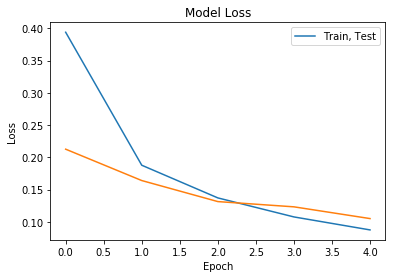

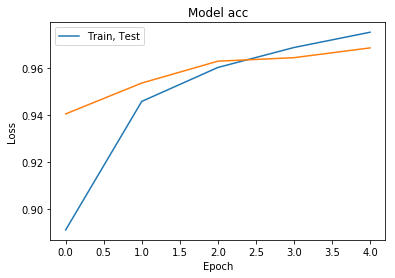

In [0]:
if __name__ == '__main__':
  main()